# Simple Harmonic Motion 
## Rahul M N - PH17B009 
In this notebook i've attempted to solve the differential equations describing the simple harmonic motion using

1. Euler methods
2. Runge Kutta Method
3. Varlet Method ( An effective method to solve equations of motion )

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
class ODESolver(object):
    def __init__(self, omega_0 = 0, theta_0 = 10, eta=0.01, n_iter=10):
        self.omega_0 = omega_0
        self.theta_0 = theta_0
        self.eta = eta
        self.n_iter = n_iter
        
    def euler(self,alpha):
        self.time_ = np.zeros(self.n_iter)
        self.omega_ = np.zeros(self.n_iter)
        self.theta_ = np.zeros(self.n_iter)
        self.omega_[0] = self.omega_0
        self.theta_[0] = self.theta_0*np.pi/180.0
        
        for i in range(self.n_iter-1):
            self.time_[i+1] = self.time_[i] + self.eta
            self.omega_[i+1] = self.omega_[i] + self.eta*alpha(self.theta_[i])
            self.theta_[i+1] = self.theta_[i] + self.eta*self.omega_[i]
        return self
    
    def midpoint(self,alpha):
       
        self.time_ = np.zeros(self.n_iter)
        self.omega_ = np.zeros(self.n_iter)
        self.theta_ = np.zeros(self.n_iter)
        self.omega_[0] = self.omega_0
        self.theta_[0] = self.theta_0*np.pi/180.0
        
        for i in range(self.n_iter-1):
            self.time_[i+1] = self.time_[i] + self.eta
            self.omega_[i+1] = self.omega_[i] + self.eta*alpha(self.theta_[i])
            self.theta_[i+1] = self.theta_[i] + 0.5*self.eta*(self.omega_[i]+self.omega_[i+1])
        return self
    
    def verlet(self,alpha):
        
        self.time_ = np.zeros(self.n_iter)
        self.theta_ = np.zeros(self.n_iter)
        self.theta_[0] = self.theta_0*np.pi/180.0
        self.time_[1]= self.eta
        self.theta_[1] = self.theta_[0]+self.omega_0*self.eta +0.5* (self.eta**2)*alpha(self.theta_[0])
        
        for i in range(self.n_iter-2):
            self.time_[i+2] = self.time_[i+1] + self.eta
            self.theta_[i+2] = 2.0*self.theta_[i+1] -self.theta_[i] + (self.eta**2)*alpha(self.theta_[i+1])
        return self

In [3]:
def alpha(x):
    return -np.sin(x)

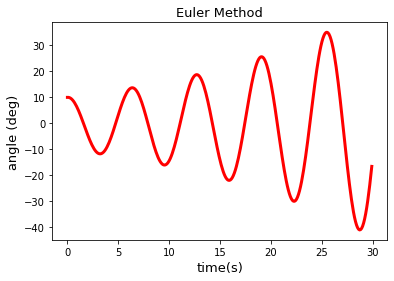

In [4]:
#Euler
time=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=300).euler(alpha).time_
theta=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=300).euler(alpha).theta_
plt.plot(time,theta*180/np.pi,lw=3,color='red')
plt.xlabel('time(s)',size=13)
plt.ylabel('angle (deg)',size=13)
plt.title('Euler Method',size=13)
plt.show()

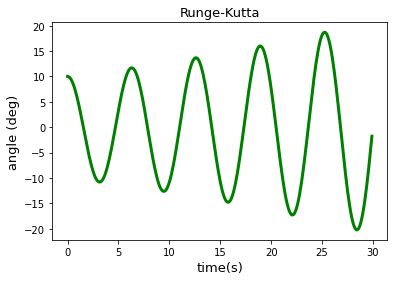

In [5]:
#Runge-Kutta
time=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=300).midpoint(alpha).time_
theta=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=300).midpoint(alpha).theta_
plt.plot(time,theta*180/np.pi,lw=3,color='green')
plt.xlabel('time(s)',size=13)
plt.ylabel('angle (deg)',size=13)
plt.title('Runge-Kutta',size=13)
plt.show()


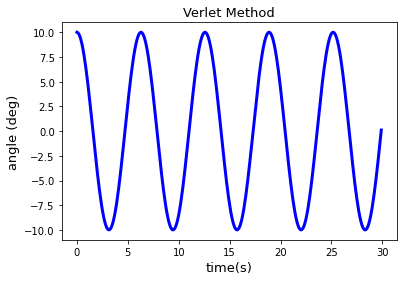

In [6]:
#Verlet Method
time=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=300).verlet(alpha).time_
theta=ODESolver(omega_0 = 0, theta_0 = 10, eta=0.1, n_iter=300).verlet(alpha).theta_
plt.plot(time,theta*180/np.pi,lw=3,color='blue')
plt.xlabel('time(s)',size=13)
plt.ylabel('angle (deg)',size=13)
plt.title('Verlet Method',size=13)
plt.show()